In [1]:
# modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

%matplotlib inline

# ignore unnecessary
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
nasa_csv = pd.read_csv('nasa.csv', index_col=0)
space_csv = pd.read_csv('space.csv', index_col=0)

In [3]:
nasa_csv.head()

Start_Datetime         End_Datetime startFrequency endFrequency  \
0  1997-04-01 14:00:00  1997-04-01 14:15:00           8000         4000   
1  1997-04-07 14:30:00  1997-04-07 17:30:00          11000         1000   
2  1997-05-12 05:15:00  1997-05-14 16:00:00          12000           80   
3  1997-05-21 20:20:00  1997-05-21 22:00:00           5000          500   
4  1997-09-23 21:53:00  1997-09-23 22:16:00           6000         2000   

  flare_Location flare_region importance CME_Date CME_Time  width  speed  CPA  \
0         S25E16         8026       M1.3    04/01    15:18   79.0  312.0   74   
1         S28E19         8027       C6.8    04/07    14:27  360.0  878.0   na   
2         N21W08         8038       C1.3    05/12    05:30  360.0  464.0   na   
3         N05W12         8040       M1.3    05/21    21:00  165.0  296.0  263   
4         S29E25         8088       C1.4    09/23    22:02  155.0  712.0  133   

   is_halo  lower_bound  
0    False        False  
1     True        False  
2     True        False  
3    False        False  
4    False        False

In [4]:
len(nasa_csv)

482

In [5]:
space_csv.tail()

Rank X_class  Region           Start_time             Max_time  \
45    46    X2.7    2339  2015-05-05 22:05:00  2015-05-05 22:11:00   
46    47    X2.7     488  2003-11-03 01:09:00  2003-11-03 01:30:00   
47    48    X2.7    8210  1998-05-06 07:58:00  1998-05-06 08:09:00   
48    49    X2.6     720  2005-01-15 22:25:00  2005-01-15 23:02:00   
49    50    X2.6    9632  2001-09-24 09:32:00  2001-09-24 10:38:00   

               End_time  
45  2015-05-05 22:15:00  
46  2003-11-03 01:45:00  
47  1998-05-06 08:20:00  
48  2005-01-15 23:31:00  
49  2001-09-24 11:09:00

In [6]:
len(space_csv)

50

## Getting Data Ready for Analysis
- Removing non-numerical items from numerical columns
- Types conversion 
- unifying attributes
 - NASA flare region has 5 digits. e.g. 10486
 - Space flare region has 4 digits. e.g. 0486

### Seperate importance 
- Seperate the importance column into 2 columns
 - importance_1: character representing the **Solar Flare** class
 - importance_2: float representing the class value

In [7]:
def seperateImportance(df, col_name='importance', numbers=True, letters=True):
    if col_name == 'X_class':
        # remove the char in the last
        df['X_class'] = df['X_class'].apply(lambda x: x[:-1] if x[-1] == '+' else x)

    if letters:
        df['importance_1'] = df[col_name].str.slice(start=0, stop=1)
    if numbers:
        df['importance_2'] = df[col_name].str.slice(start=1).astype('float')
    return df

In [8]:
# Cast attributes to datetime stamp 
def to_datetime(df, nasa=False, space=False):
    if nasa:
        df.Start_Datetime = pd.to_datetime(df.Start_Datetime)
        df.End_Datetime = pd.to_datetime(df.End_Datetime)
        df.CME_Time = pd.to_datetime(df.CME_Time)
    if space:
        df.Start_time = pd.to_datetime(df.Start_time)
        df.Max_time = pd.to_datetime(df.Max_time)
        df.End_time = pd.to_datetime(df.End_time)
    
    return df

In [9]:
# Cast time attributes to datetime stamp
nasa_csv = to_datetime(nasa_csv, nasa=True)
space_csv = to_datetime(space_csv, space=True)

In [10]:
# replacing 'non-numerical values' with nan in the importance column
nasa_csv = nasa_csv[nasa_csv.importance != 'FILA']

# replacing 'non-numerical values' with nan in the region column
nasa_csv.flare_region = nasa_csv.flare_region.str.extract('(\d+)', expand=False)

In [11]:
# cast flare region to float
nasa_csv.flare_region = nasa_csv.flare_region.astype('float')
# change NASA's flare region from 5 to 4 digits
nasa_csv.flare_region = nasa_csv.flare_region.apply(lambda x:x-10000 if x>10000 else x)

# preprocess space flare region
space_csv.Region = space_csv.Region.astype('float')

In [12]:
# show data types
space_csv.dtypes

Rank                   int64
X_class               object
Region               float64
Start_time    datetime64[ns]
Max_time      datetime64[ns]
End_time      datetime64[ns]
dtype: object

In [13]:
nasa_csv.dtypes

Start_Datetime    datetime64[ns]
End_Datetime      datetime64[ns]
startFrequency            object
endFrequency              object
flare_Location            object
flare_region             float64
importance                object
CME_Date                  object
CME_Time          datetime64[ns]
width                    float64
speed                    float64
CPA                       object
is_halo                     bool
lower_bound                 bool
dtype: object

# Part 2 Q1: Replication  

In [14]:
# seperate importance
nasa_csv = seperateImportance(nasa_csv, 'importance')

### Sorting the dataframe according to the importance of the Solar Flare
- First, it sorts using `importance_1` values so the character `X` is put at the top of the table
- Second, it sorts using `importance_2` values so the flares with the highes value are put at the top

In [15]:
nasa_csv = nasa_csv.sort_values(['importance_1', 'importance_2'], ascending=False)

In [16]:
# drop the importance_1, importance_2 columns
nasa_csv.drop(['importance_1', 'importance_2'], axis=1, inplace=True)

In [17]:
# showing top 3
nasa_csv[:3]

Start_Datetime        End_Datetime startFrequency endFrequency  \
242 2003-11-04 20:00:00 2003-11-05 00:00:00          10000          200   
119 2001-04-02 22:05:00 2001-04-03 02:30:00          14000          250   
234 2003-10-28 11:10:00 2003-10-30 00:00:00          14000           40   

    flare_Location  flare_region importance CME_Date            CME_Time  \
242         S19W83         486.0       X28.    11/04 2020-03-26 19:54:00   
119         N19W72        9393.0       X20.    04/02 2020-03-26 22:06:00   
234         S16E08         486.0       X17.    10/28 2020-03-26 11:30:00   

     width   speed  CPA  is_halo  lower_bound  
242  360.0  2657.0   na     True        False  
119  244.0  2505.0  261    False        False  
234  360.0  2459.0   na     True        False

### Replication Analysis

In [18]:
# get the top 50 of nasa
nasa_50 = nasa_csv[:50]

### Replication Criteria 
- in Both NASA and SPACE dataframes
 1. Get all flares that happened in the same region
 2. Get all flares that have the same starting time 
 3. Check the number of rows
 4. Check the mean of the flare `X_class` and `importance`

In [19]:
dicOfMatch={}
for s_row in space_csv.itertuples(index=False):
    same_region = []
    # checking the same region
    for n_row in nasa_50.itertuples(index=False):
        if s_row.Region == n_row.flare_region:
             same_region.append(n_row)

    # chacking the same starting date[year, month, day]
    for n_row in same_region:
        if n_row.Start_Datetime.date()==s_row.Start_time.date():
            dicOfMatch[s_row]=n_row
print(f'Number of matching rows: {len(dicOfMatch)}')

Number of matching rows: 32


In [20]:
match_nasa = pd.DataFrame(dicOfMatch.values())
match_nasa[:5]

Start_Datetime        End_Datetime startFrequency endFrequency  \
0 2003-11-04 20:00:00 2003-11-05 00:00:00          10000          200   
1 2001-04-02 22:05:00 2001-04-03 02:30:00          14000          250   
2 2003-10-28 11:10:00 2003-10-30 00:00:00          14000           40   
3 2001-04-15 14:05:00 2001-04-16 13:00:00          14000           40   
4 2003-10-29 20:55:00 2003-10-30 00:00:00          11000          500   

  flare_Location  flare_region importance CME_Date            CME_Time  width  \
0         S19W83         486.0       X28.    11/04 2020-03-26 19:54:00  360.0   
1         N19W72        9393.0       X20.    04/02 2020-03-26 22:06:00  244.0   
2         S16E08         486.0       X17.    10/28 2020-03-26 11:30:00  360.0   
3         S20W85        9415.0       X14.    04/15 2020-03-26 14:06:00  167.0   
4         S15W02         486.0       X10.    10/29 2020-03-26 20:54:00  360.0   

    speed  CPA  is_halo  lower_bound  
0  2657.0   na     True        False  
1  2505.0  261    False        False  
2  2459.0   na     True        False  
3  1199.0  245    False        False  
4  2029.0   na     True        False

In [21]:
match_space = pd.DataFrame(dicOfMatch.keys())
match_space[:5]

Rank X_class  Region          Start_time            Max_time  \
0     1    X28+   486.0 2003-11-04 19:29:00 2003-11-04 19:53:00   
1     2    X20+  9393.0 2001-04-02 21:32:00 2001-04-02 21:51:00   
2     3  X17.2+   486.0 2003-10-28 09:51:00 2003-10-28 11:10:00   
3     5   X14.4  9415.0 2001-04-15 13:19:00 2001-04-15 13:50:00   
4     6     X10   486.0 2003-10-29 20:37:00 2003-10-29 20:49:00   

             End_time  
0 2003-11-04 20:06:00  
1 2001-04-02 22:03:00  
2 2003-10-28 11:24:00  
3 2001-04-15 13:55:00  
4 2003-10-29 21:01:00

In [22]:
match_nasa = seperateImportance(match_nasa, letters=False)
match_space = seperateImportance(match_space, 'X_class', letters=False)

In [23]:
# getting the mean
print("Mean:", (abs(match_nasa.importance_2 - match_space.importance_2)).mean())

Mean: 0.19374999999999998


### Conclusion Analysis 
- When doing the matching using the region where the flare happened and the date of the region
 - we only get 32 matching rows
 - the mean differnce between the NASA's `importance` and SPACE `X_class` is: `0.19374999999999998`
- So based on that the 2 datasets have slightly different values for the same Flare event, so we won't be able to replicate the whole data with high accuracy

# Part 2 Q2: Integration  

- get the common attributes
 - Start Time, End Stime, Region, CME Time, Importance
- define the matching criteria

In [24]:
# get smaller version of the 2 dataframes with only the common columns
nasa_50_small = nasa_50[['importance', 'flare_region', 'Start_Datetime', 'End_Datetime', 'CME_Time']]

In [25]:
nasa_50_small.head()

importance  flare_region      Start_Datetime        End_Datetime  \
242       X28.         486.0 2003-11-04 20:00:00 2003-11-05 00:00:00   
119       X20.        9393.0 2001-04-02 22:05:00 2001-04-03 02:30:00   
234       X17.         486.0 2003-10-28 11:10:00 2003-10-30 00:00:00   
128       X14.        9415.0 2001-04-15 14:05:00 2001-04-16 13:00:00   
235       X10.         486.0 2003-10-29 20:55:00 2003-10-30 00:00:00   

               CME_Time  
242 2020-03-26 19:54:00  
119 2020-03-26 22:06:00  
234 2020-03-26 11:30:00  
128 2020-03-26 14:06:00  
235 2020-03-26 20:54:00

### Criteria
- After reading about **Solar Flares** we found that the most defining feature is the `importance`/`X_class` of the flare, so we built our criteria around it.

#### First
- get the difference between the current solar flare `X_class` in the **SPACE** dataframe and get the difference between it and all `importance` values in the **NASA** datafrme 

#### Second 
- get the **NASA** row with the smalles difference as the matching row

#### Third 
- add the `Space_Rank` column to the **NASA** dataframe
- calculate the mean difference between the matched dataframe and **SPACE** dataframe

#### Why didn't we use the region or the starting date?
- we didn't use the region as it won't produce 50 rows, as some regions are available at **SPACE** dataframe but not in **NASA**
- we also didn't use the starting date as it's not consistent in the 2 dataframes

#### Why did we use **NASA TOP 50** instead of **NASA**?
- we found that **NASA TOP 50**'s range was enough to cover the whole range of `X_class` values of **SPACE** dataframe so there will be no need to compare the whole **NASA** dataframe

In [26]:
def bestMatching(df1=space_csv, df2=nasa_50_small):
    # seperate the value of the X-class/Importance from space
    df1 = seperateImportance(df1, 'X_class', letters=False)
    df2 = seperateImportance(df2, letters=False)

    nasa_csv['Space_Rank'] = ""

    rows = []
    for row in df1.itertuples(index=True):
        near_x = {}
        for r in df2.itertuples(index=True):
            near_x[abs(r.importance_2 - row.importance_2)] = r
        if len(near_x) > 0:
            best_match = near_x[min(near_x.keys())] 
            rows.append(best_match)
            nasa_csv.Space_Rank.loc[best_match.Index] = nasa_csv.Space_Rank.loc[best_match.Index]+str(row.Rank)+' '
        # calc mean error
        mean_error = abs(pd.DataFrame(rows).importance_2 - df1.importance_2).mean()

    # replace "" with nan
    nasa_csv['Space_Rank'].replace("", 'nan', inplace=True)
    
    
    return pd.DataFrame(rows).drop('importance_2', axis=1), mean_error

In [27]:
nasa_best_matching, mean_error = bestMatching(space_csv, nasa_50)
print(f'Mean Error: {mean_error}')
nasa_best_matching.head()

Mean Error: 0.020000000000000007


Index      Start_Datetime        End_Datetime startFrequency endFrequency  \
0    242 2003-11-04 20:00:00 2003-11-05 00:00:00          10000          200   
1    119 2001-04-02 22:05:00 2001-04-03 02:30:00          14000          250   
2    234 2003-10-28 11:10:00 2003-10-30 00:00:00          14000           40   
3    234 2003-10-28 11:10:00 2003-10-30 00:00:00          14000           40   
4    128 2001-04-15 14:05:00 2001-04-16 13:00:00          14000           40   

  flare_Location  flare_region importance CME_Date            CME_Time  width  \
0         S19W83         486.0       X28.    11/04 2020-03-26 19:54:00  360.0   
1         N19W72        9393.0       X20.    04/02 2020-03-26 22:06:00  244.0   
2         S16E08         486.0       X17.    10/28 2020-03-26 11:30:00  360.0   
3         S16E08         486.0       X17.    10/28 2020-03-26 11:30:00  360.0   
4         S20W85        9415.0       X14.    04/15 2020-03-26 14:06:00  167.0   

    speed  CPA  is_halo  lower_bound  
0  2657.0   na     True        False  
1  2505.0  261    False        False  
2  2459.0   na     True        False  
3  2459.0   na     True        False  
4  1199.0  245    False        False

In [28]:
nasa_csv[:50]

Start_Datetime        End_Datetime startFrequency endFrequency  \
242 2003-11-04 20:00:00 2003-11-05 00:00:00          10000          200   
119 2001-04-02 22:05:00 2001-04-03 02:30:00          14000          250   
234 2003-10-28 11:10:00 2003-10-30 00:00:00          14000           40   
128 2001-04-15 14:05:00 2001-04-16 13:00:00          14000           40   
235 2003-10-29 20:55:00 2003-10-30 00:00:00          11000          500   
8   1997-11-06 12:20:00 1997-11-07 08:30:00          14000          100   
330 2006-12-05 10:50:00 2006-12-05 20:00:00          14000          250   
238 2003-11-02 17:30:00 2003-11-03 01:00:00          12000          250   
290 2005-01-20 07:15:00 2005-01-20 16:30:00          14000           25   
360 2011-08-09 08:20:00 2011-08-09 08:35:00          16000         4000   
333 2006-12-06 19:00:00 2006-12-09 00:00:00          16000           30   
319 2005-09-09 19:45:00 2005-09-09 22:00:00          10000           50   
83  2000-07-14 10:30:00 2000-07-15 14:30:00          14000           80   
123 2001-04-06 19:35:00 2001-04-07 01:50:00          14000          230   
376 2012-03-07 01:00:00 2012-03-08 19:00:00          16000           30   
137 2001-08-25 16:50:00 2001-08-25 23:00:00           8000          170   
444 2014-02-25 00:56:00 2014-02-25 11:28:00          14000          100   
195 2002-07-23 00:50:00 2002-07-23 04:00:00          11000          400   
106 2000-11-26 17:00:00 2000-11-26 17:15:00          14000         7000   
240 2003-11-03 10:00:00 2003-11-03 12:30:00           6000          400   
289 2005-01-17 10:00:00 2005-01-17 10:35:00           6100         1500   
223 2003-05-28 01:00:00 2003-05-29 00:30:00           1000          200   
162 2001-12-28 20:35:00 2001-12-29 03:00:00          14000          350   
334 2006-12-13 02:45:00 2006-12-13 10:40:00          12000          150   
194 2002-07-20 21:30:00 2002-07-20 22:20:00          10000         2000   
405 2013-05-14 01:16:00 2013-05-14 02:35:00          16000          700   
202 2002-08-24 01:45:00 2002-08-24 03:25:00           5000          400   
404 2013-05-13 16:15:00 2013-05-13 19:10:00          16000          300   
19  1998-05-06 08:25:00 1998-05-06 08:35:00          14000         5000   
239 2003-11-03 01:15:00 2003-11-03 01:25:00           3000         1500   
9   1997-11-27 13:30:00 1997-11-27 14:00:00          14000         7000   
144 2001-09-24 10:45:00 2001-09-25 20:00:00           7000           30   
286 2005-01-15 23:00:00 2005-01-15 00:00:00           3000           40   
278 2004-11-10 02:25:00 2004-11-10 03:40:00          14000         1000   
73  2000-06-06 15:20:00 2000-06-08 09:00:00          14000           40   
101 2000-11-24 15:25:00 2000-11-24 22:00:00          14000          200   
125 2001-04-10 05:24:00 2001-04-11 00:00:00          14000          100   
347 2011-02-15 02:10:00 2011-02-15 07:00:00          16000          400   
7   1997-11-04 06:00:00 1997-11-05 04:30:00          14000          100   
320 2005-09-10 21:45:00 2005-09-10 01:00:00          14000          300   
362 2011-09-06 22:30:00 2011-09-07 15:40:00          16000          150   
421 2013-10-25 15:08:00 2013-10-25 22:32:00          16000          200   
100 2000-11-24 05:10:00 2000-11-24 15:00:00          14000          100   
127 2001-04-12 10:20:00 2001-04-12 10:40:00          14000         7000   
276 2004-11-07 16:25:00 2004-11-08 20:00:00          14000           60   
287 2005-01-17 09:25:00 2005-01-17 16:00:00          14000           30   
104 2000-11-25 19:00:00 2000-11-25 19:35:00           6000         2000   
49  1999-10-14 09:10:00 1999-10-14 10:00:00          14000         4000   
102 2000-11-24 22:24:00 2000-11-24 22:36:00           4000         3000   
191 2002-07-18 07:55:00 2002-07-18 08:45:00          14000         1500   

    flare_Location  flare_region importance CME_Date            CME_Time  \
242         S19W83         486.0       X28.    11/04 2020-03-26 19:54:00   
119         N19W72        9393.

# Part 2 Q3: Analysis

In [29]:
# our colors
colors_list = ['#5cb85c','#d9534f']

# autolabel
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height*100:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Halo Proportion: Nasa vs Nasa Top 50
#### First
- we get the *proportion* of **Halos** in the **NASA** and **NASA TOP 50** dataframes

#### Second 
- we use a barplot to show the 2 proportions side by side

### Analysis
- it's clear that **NASA TOP 50** dataframe has a higher percentage `84.00%` of **HALOS** vs `54.89%` in **NASA**
- Flares which have higher `X_class`/`importance` values tend to have more **HALOS**
 - the more powerful the **Solar Flare** is the more likely for it to have a **HALO**


<img src='CME.gif' alt='Coronal Mass Ejection'>

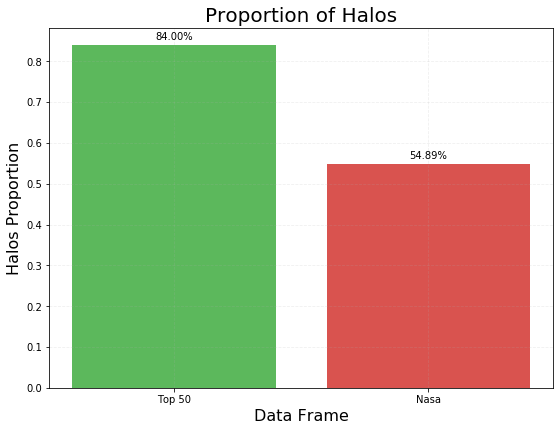

In [30]:
# get the props of halos in both dataframes
nasa_halo_perc = nasa_csv.is_halo.sum()/len(nasa_csv) 
nasa_50_halo_perc = nasa_50.is_halo.sum()/len(nasa_50)
props = [nasa_50_halo_perc, nasa_halo_perc]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['Top 50', 'Nasa'], props, color=colors_list)
ax.set_title('Proportion of Halos', fontsize=20)
ax.set_ylabel('Halos Proportion', fontsize=16)
ax.set_xlabel('Data Frame', fontsize=16)
ax.grid(True, alpha=0.2, ls='--')
autolabel(ax.patches)

plt.show()

# Do Strong Flares Cluster in Time?

In [31]:
# get the number of flares per month for the given dataset
def flares_per_month(df):
    flares_num = {}
    for t in df.Start_Datetime:
        if t.month in flares_num:
            flares_num[t.month] += 1
        else:
            flares_num[t.month] = 1
            
    return flares_num

In [32]:
# the number of flares per month in the nasa top 50
flares_num_50 = flares_per_month(nasa_50)

In [33]:
len(flares_num_50)

12

In [34]:
flares_num_50

{11: 14, 4: 5, 10: 4, 12: 4, 1: 4, 8: 3, 9: 4, 7: 4, 3: 1, 2: 2, 5: 4, 6: 1}

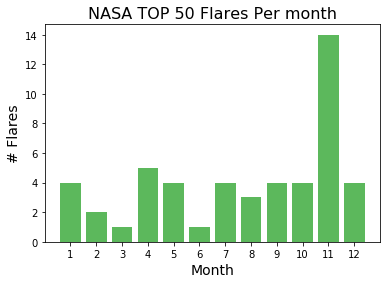

In [35]:
plt.bar(flares_num_50.keys(), flares_num_50.values(), color=colors_list[0])
plt.xticks(range(1,13))
plt.title('NASA TOP 50 Flares Per month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('# Flares', fontsize=14)
plt.show()

In [36]:
flares_num_all = flares_per_month(nasa_csv)
len(flares_num_all)

12

In [37]:
flares_num_all

{11: 63,
 4: 46,
 10: 41,
 12: 35,
 1: 37,
 8: 37,
 9: 42,
 7: 43,
 3: 37,
 2: 16,
 5: 44,
 6: 40}

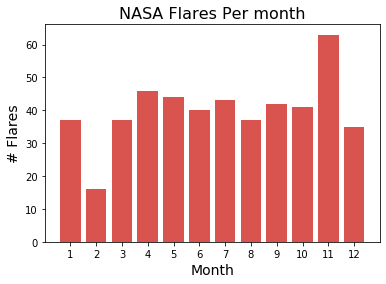

In [38]:
plt.bar(flares_num_all.keys(), flares_num_all.values() ,color=colors_list[1])
plt.xticks(range(1,13))
plt.title('NASA Flares Per month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('# Flares', fontsize=14)
plt.show()

# Number of Flares per Months 
- Plotting the two plots next to each other to better understand the difference

## Analysis
### First
- The solares flares events are spread and occur during all months of the year

### Second 
- All types of **Solar Flares** are minimum during **February**
- Strong **Solar flares** are minimum during **March** and **june**

### Third
- The highest number of **Solar Flares** events occurs in **November**
- And **November** has also the highest number of Strong **Solar Flares**

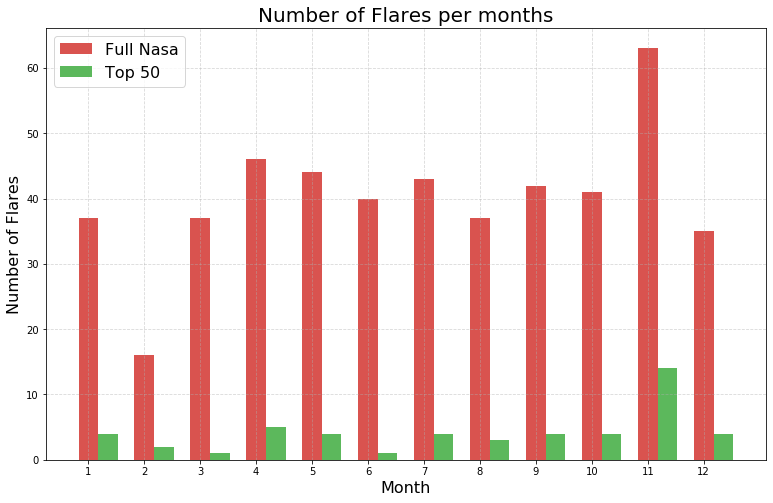

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(flares_num_all.keys(), flares_num_all.values(), color=colors_list[1], width=0.35)
ax.bar(np.array(list(flares_num_50.keys())) + .35, flares_num_50.values(), color=colors_list[0], width=0.35)
ax.set_ylabel('Number of Flares', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
ax.set_title('Number of Flares per months', fontsize=20)
ax.set_xticks(range(1, 13))
ax.legend(labels=['Full Nasa', 'Top 50'], fontsize=16)
ax.grid(True, alpha=0.5, ls='--')
plt.show()

In [43]:
# sort nasa according to the starting time
nasa_50_sorted = nasa_50.sort_values(['Start_Datetime'])
nasa_50_sorted = seperateImportance(nasa_50_sorted, letters=False)

# The Top 50 Solar Flares over time
- plotting the `importance`/`X_class` of **Flare Events** over years

## Analysis
### First 
- The last 10 years [2005 to 2015], all solar flares were relatively small as no solar flare approached `X10`
- and **X_class Solar Flares** occured every year without stopping from `1998` to `2015`
### Second
- The most powerfull events occured between `2001` and `2005`


#### [Biggest Ever recorded at its time](https://visibleearth.nasa.gov/images/55580/biggest-solar-flare-on-record) (2001)
![Superflarecombo](https://eoimages.gsfc.nasa.gov/images/imagerecords/55000/55580/superflarecombo_lrg.jpg)

>At 4:51 p.m. EDT, on Monday, April 2, 2001, the sun unleashed the biggest solar flare ever recorded, as observed by the Solar and Heliospheric Observatory (SOHO) satellite. The flare was definitely more powerful than the famous solar flare on March 6, 1989, which was related to the disruption of power grids in Canada.



#### [Giant Halloween](https://www.space.com/23396-scary-halloween-solar-storm-2003-anniversary.html) (late 2003)

![Giant Halloween](https://cdn.mos.cms.futurecdn.net/CG4AYqMUpizKyDnoCWYYeK-970-80.jpg) 
                                                                                    
>scientists worldwide got the spooks when a Halloween solar storm disrupted communications, GPS and even a United States defense operation.
>While residents in Texas and Florida delighted in auroras usually not seen that far south, the storm (which was most intense between about Oct. 29 and 31, 2003) caused some spooky sun-spawned havoc both on the Earth and above it

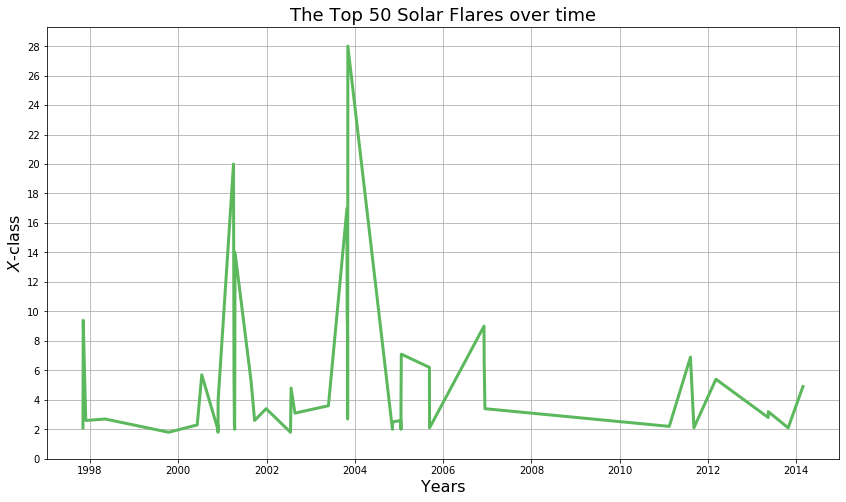

In [161]:
fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(nasa_50_sorted.Start_Datetime,  nasa_50_sorted.importance_2, lw=3, color=colors_list[0])
ax.set_title("The Top 50 Solar Flares over time", fontsize=18)
ax.set_xlabel("Years", fontsize=16)
ax.set_ylabel("$X$-class", fontsize=16)
ax.set_yticks(range(0, 30, 2))
ax.grid(True)
plt.show()